###**MBA em IA E BIGDATA**
###**CURSO 2 - AM, CD E DM**
### **PROFA. ROSELI A. F. ROMERO**

##  **Dados desbalanceados**
#**OBJETIVOS**:
#- ABORDAGEM UNDERSAMPLING
#- ABORDAGEM OVERSAMPLING
#- ABORDAGEM HÍBRIDA 
---

#No dataset que será utilizado nesse exercício, cada elemento representa uma transação com cartões de crédito. 

#A base possui 30 atributos. `Time` representa o tempo em segundos desde a primeira transação da base. `Amount` corresponde ao valor da transação.

#Outros 28 atributos numéricos anonimizados também são fornecidos, com 1 variável (`Class`) de saída onde 1 significa fraude e 0 transação normal.

 

###**Questão 01**.
#Carregue o dataset `creditcard_sampled.csv` e mostre a distribuição das classes:

*   Via histograma
*   Exibindo o número de ocorrências de cada classe



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
dados = pd.read_csv('creditcard_sampled.csv', index_col=0)
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10492 entries, 541 to 87896
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10492 non-null  float64
 1   V1      10492 non-null  float64
 2   V2      10492 non-null  float64
 3   V3      10492 non-null  float64
 4   V4      10492 non-null  float64
 5   V5      10492 non-null  float64
 6   V6      10492 non-null  float64
 7   V7      10492 non-null  float64
 8   V8      10492 non-null  float64
 9   V9      10492 non-null  float64
 10  V10     10492 non-null  float64
 11  V11     10492 non-null  float64
 12  V12     10492 non-null  float64
 13  V13     10492 non-null  float64
 14  V14     10492 non-null  float64
 15  V15     10492 non-null  float64
 16  V16     10492 non-null  float64
 17  V17     10492 non-null  float64
 18  V18     10492 non-null  float64
 19  V19     10492 non-null  float64
 20  V20     10492 non-null  float64
 21  V21     10492 non-null  float64
 

#Usar a função describe() para obter: media, desvio e os quartis. Mais uma opção para o cálculo destes valores.

In [ ]:
dados.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,...,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000
mean,94575.991517,-0.239672,0.182315,-0.313558,0.222039,-0.146197,-0.057576,-0.261065,0.038360,-0.104762,...,0.044817,0.001228,-0.006058,-0.002730,-0.009024,0.002382,0.004307,0.003299,88.933530,0.046893
std,47451.427058,2.576463,1.948389,2.576912,1.791061,1.840691,1.353958,2.235209,1.847805,1.327058,...,1.090769,0.771148,0.714547,0.602594,0.547541,0.485040,0.491986,0.321536,238.644324,0.211419
min,46.000000,-30.552380,-28.416644,-31.103685,-4.825500,-22.105532,-8.710536,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-26.751119,-2.687773,-7.495741,-1.435545,-7.263482,-8.464609,0.000000,0.000000
25%,54326.250000,-1.022744,-0.558572,-1.055655,-0.791536,-0.747570,-0.798002,-0.625844,-0.201572,-0.711837,...,-0.219110,-0.532876,-0.166731,-0.351223,-0.331848,-0.328355,-0.070652,-0.052365,5.292500,0.000000
50%,85284.000000,-0.107640,0.111580,0.103812,0.081231,-0.080063,-0.291464,0.013494,0.040403,-0.074152,...,-0.015178,0.016116,-0.010357,0.038511,0.006540,-0.049401,0.005321,0.012951,22.725000,0.000000
75%,138736.500000,1.284127,0.891316,1.002551,0.904758,0.602265,0.390695,0.545365,0.367888,0.587679,...,0.210480,0.536244,0.151803,0.433529,0.346176,0.260984,0.105889,0.086188,79.000000,0.000000
max,172784.000000,2.385792,22.057729,4.017561,12.114672,16.160824,15.323769,18.585208,20.007208,10.392889,...,27.202839,8.361985,12.214433,3.990646,3.332320,3.463246,5.480808,9.876371,7636.300000,1.000000


# Cálculo do Histograma

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2abafc5950>]],
      dtype=object)

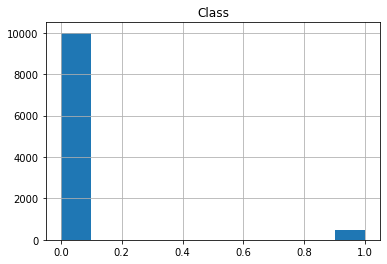

In [ ]:
dados.hist('Class')

In [ ]:
dados['Class'].value_counts()

0    10000
1      492
Name: Class, dtype: int64



---

### **Questão 02**.

#Separe o conjunto de dados em variáveis de entrada e variável alvo.

In [ ]:
inputs = dados.iloc[:, :-1].to_numpy()
targets = dados.iloc[:, -1].to_numpy()

print(np.bincount(targets))

[10000   492]




---

### **Questão 03**.

#Crie uma função que aplique a técnica de subamostragem aleatória nesse conjunto de dados. 
#- Sua função deve receber como entrada a base normalizada e as classes.

#- Sua função e deve retornar um novo conjunto onde todas as classes devem ter o número de ocorrências da classe com **menor representatividade no conjunto de dados inicial** e um array com as respectivas labels.
#- Mostre o resultado plotando um histograma da distribuição resultante classes 

(array([492.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 492.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

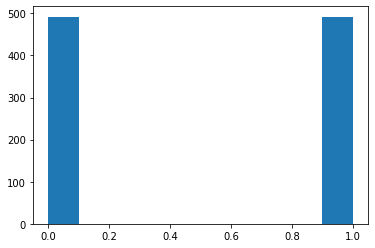

In [ ]:
def undersample(inputs, targets):
  # Separando os ids dos elementos que pertecem à cada classe
  classe_0_ids = np.where(targets == 0)[0]
  classe_1_ids = np.where(targets == 1)[0]

  # Guardando quantos elementos temos em cada classe
  tamanhos_classes = [len(x) for x in [classe_0_ids, classe_1_ids]]
  menor_classe = np.min(tamanhos_classes)

  # Usando numpy para fazer amostragem aleatória sem repetição (replace=false), selecionando o nro de elementos da menor classe
  # Assim teremos todos os elementos da menor classe e o mesmo nro da maior
  classe_0_sampled_ids = np.random.choice(classe_0_ids, size=menor_classe, replace=False)
  classe_1_sampled_ids = np.random.choice(classe_1_ids, size=menor_classe, replace=False)
  
  # Até agora estávamos apenas operando nos IDs agora vamos pegar os elementos selecionados no inputs
  undersampled_data = np.concatenate([inputs[classe_0_sampled_ids],
                                 inputs[classe_1_sampled_ids]])
  # O mesmo é feito para o target
  undersampled_targets = np.concatenate([targets [classe_0_sampled_ids],
                                      targets [classe_1_sampled_ids]])
  return undersampled_data, undersampled_targets

undersampled_data, undersampled_targets = undersample(inputs, targets)
plt.hist(undersampled_targets)



---

### **Questão 04**.

#Crie uma função que aplique a técnica de superamostragem aleatória nesse conjunto de dados. 

#- Sua função deve receber como entrada a base normalizada e as classes.

#- Sua função deve receber como entrada a base original e retornar um novo conjunto de dados onde todas as classes devem ter o número de ocorrências da classe com **maior representatividade no conjunto de dados inicial** e um array com as respectivas labels.
#- Mostre o resultado plotando um histograma da distribuição resultante classes 

(array([10000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 10000.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

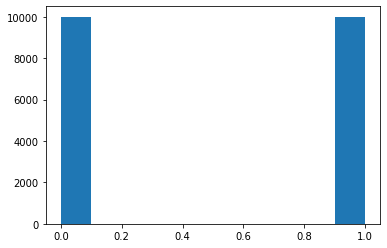

In [ ]:
def oversample(inputs, targets):
  # Separando os ids dos elementos que pertecem à cada classe
  classe_0_ids = np.where(targets == 0)[0]
  classe_1_ids = np.where(targets == 1)[0]

  # Computando o nro de elementos de cada classe e definindo o nro de elementos
  # da classe majoritária
  tamanhos_classes = [len(x) for x in [classe_0_ids, classe_1_ids]]
  maior_classe = np.max(tamanhos_classes)

  # Se tivermos menos elementos do que a maior classe, estamos trabalhando na classe minoritária
  # Assim, queremos fazer oversample (replace=True) para aumentar o nro de elementos
  replace = False
  if tamanhos_classes[0] < maior_classe:
    replace = True
  classe_0_sampled_ids = np.random.choice(classe_0_ids, size=maior_classe, replace=replace)
  
  # Da mesma forma para a segunda classe
  replace = False
  if tamanhos_classes[1] < maior_classe:
    replace = True
  classe_1_sampled_ids = np.random.choice(classe_1_ids, size=maior_classe, replace=replace)

  # Até agora estávamos apenas operando nos IDs agora vamos pegar os elementos selecionados no inputs
  oversampled_data = np.concatenate([inputs[classe_0_sampled_ids],
                                 inputs[classe_1_sampled_ids]])
  # O mesmo é feito com o target
  oversampled_targets = np.concatenate([targets [classe_0_sampled_ids],
                                      targets [classe_1_sampled_ids]])
  return oversampled_data, oversampled_targets

oversampled_data, oversampled_targets = oversample(inputs, targets)
plt.hist(oversampled_targets)

---

### **Questão 05**.

#Crie uma função que utilize técnicas de subamostragem e superamostragem nesse conjunto de dados para balancear o número de exemplos de cada classe.

#- Sua função deve receber como entrada a base normalizada e as classes.
#- Sua função deve receber como entrada a base original e retornar uma nova base onde todas as classes devem ter o número de ocorrências **igual à $\frac{tamanho\_dataset}{3}$** e um array com as respectivas labels.
#- Mostre o resultado plotando um histograma da distribuição resultante classes 

(array([3497.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3497.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

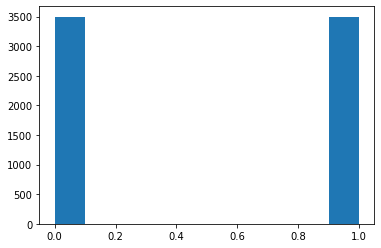

In [ ]:
def dataset_sample(inputs, targets):
  # O número de elementos desejado é goal_size (isso também poderia vir por parâmetro)
  goal_size = int(len(targets) / 3)

  # Separando os ids dos elementos que pertecem à cada classe
  classe_0_ids = np.where(targets == 0)[0]
  classe_1_ids = np.where(targets == 1)[0]
  tamanhos_classes = [len(x) for x in [classe_0_ids, classe_1_ids]]

  # Assim como no oversample, decidimos se faremos amostragem com ou sem repetição comparando
  # o número de elementos da classe com o objetivo. Agora queremos que cada classe tenha goal_size elementos
  replace = False
  if tamanhos_classes[0] < goal_size:
    replace = True
  classe_0_sampled_ids = np.random.choice(classe_0_ids, size=goal_size, replace=replace)
  
  replace = False
  if tamanhos_classes[1] < goal_size:
    replace = True
  classe_1_sampled_ids = np.random.choice(classe_1_ids, size=goal_size, replace=replace)

  # Até agora estávamos apenas operando nos IDs agora vamos pegar os elementos selecionados no inputs
  dataset_sampled_data = np.concatenate([inputs[classe_0_sampled_ids],
                                 inputs[classe_1_sampled_ids]])
  # O mesmo para o target
  dataset_sampled_targets = np.concatenate([targets [classe_0_sampled_ids],
                                      targets [classe_1_sampled_ids]])
  return dataset_sampled_data, dataset_sampled_targets

dataset_sampled_data, dataset_sampled_targets = dataset_sample(inputs, targets)
plt.hist(dataset_sampled_targets)